<a href="https://colab.research.google.com/github/SUNWOUNG/HOMEWORK/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

data = pd.read_csv('sample_data/test.csv')  
print('Dataset shape:', data.shape)
data.describe()



Dataset shape: (101, 147)


,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,max_Number,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Sm
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,2.158416,0.710796,0.645857,0.607936,0.595974,0.588407,42.077558,43.000000,19.116887,65.475248,...,176.089109,194.493399,0.220671,0.047447,0.297285,0.434596,0.089109,0.108537,0.049904,16.268317
std,0.366952,0.062409,0.080324,0.098001,0.106964,0.114048,8.078302,9.704638,4.412545,2.629046,...,42.641083,36.578211,0.077511,0.055472,0.201148,0.148166,0.286322,0.098284,0.049491,8.894025
min,2.000000,0.577350,0.480750,0.415244,0.389977,0.372041,25.000000,16.000000,7.111111,59.000000,...,64.000000,64.000000,0.111111,0.000000,0.000000,0.096774,0.000000,0.023739,0.010551,2.000000
25%,2.000000,0.707107,0.629961,0.574349,0.552045,0.535887,36.500000,37.000000,16.444444,64.000000,...,194.000000,194.000000,0.171429,0.000000,0.129630,0.333333,0.000000,0.070306,0.031247,10.000000
50%,2.000000,0.745356,0.693361,0.670782,0.667408,0.666732,41.000000,40.000000,18.666667,66.000000,...,194.000000,194.000000,0.200000,0.038462,0.344828,0.420000,0.000000,0.106157,0.044550,15.500000
75%,2.000000,0.745356,0.693361,0.670782,0.667408,0.666732,47.500000,52.000000,20.888889,67.000000,...,194.000000,216.666667,0.240000,0.076923,0.451613,0.555556,0.000000,0.112214,0.051242,21.300000
max,3.000000,0.790569,0.759147,0.750616,0.750049,0.750001,61.666667,62.000000,30.500000,69.000000,...,194.000000,225.000000,0.545455,0.222222,0.656250,0.733333,1.000000,0.567090,0.283545,47.460000


In [11]:
from sklearn.utils import shuffle

features = list(data)[1:-1]

properties = list(data)[-1]

data = shuffle(data, random_state=0)
X = data[features]
y = data[properties]


print('number of features:', len(features))


data.head()

number of features: 145


,compound,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Sm
26,TbB2,2,0.745356,0.693361,0.670782,0.667408,0.666732,25.0,60,26.666667,...,166,166.000000,0.352941,0.117647,0.000000,0.529412,0,0.158210,0.070316,10.0
86,TbFeSi,3,0.577350,0.480750,0.415244,0.389977,0.372041,35.0,51,20.000000,...,194,216.666667,0.260870,0.086957,0.260870,0.391304,0,0.112214,0.045570,17.5
2,GdAl2,2,0.745356,0.693361,0.670782,0.667408,0.666732,30.0,51,22.666667,...,194,225.000000,0.375000,0.125000,0.062500,0.437500,0,0.041154,0.018291,6.5
55,TbNi,2,0.707107,0.629961,0.574349,0.552045,0.535887,46.5,37,18.500000,...,194,209.500000,0.190476,0.000000,0.380952,0.428571,0,0.115294,0.057647,21.5
75,Tb3Co,2,0.790569,0.759147,0.750616,0.750049,0.750001,55.5,38,14.250000,...,194,194.000000,0.190476,0.000000,0.166667,0.642857,0,0.106157,0.039809,15.4


In [12]:
#Task 1

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)


reg = RandomForestRegressor(n_estimators=10, random_state=100)  
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
y_pred

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
np.sqrt(mean_squared_error(y_test, y_pred)) 

scores = cross_val_score(reg, X, y, cv=4)  




scores.mean()

0.3229037392782848

In [14]:
from sklearn.feature_selection import VarianceThreshold

sel =  VarianceThreshold(threshold=(0.95*(1-0.95)))

X_sel = sel.fit_transform(X)


feature_index = sel.get_support()
print('number of features after remove redundant ones:',sum(feature_index))



final_features=sel.get_feature_names_out()


print(len(final_features))


number of features after remove redundant ones: 117
117


In [15]:
#Task 2

In [16]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_sel)

X_sc = scaler.transform(X_sel)



print('X shape:', X_sc.shape)



X shape: (101, 117)


In [17]:
from scipy.stats import spearmanr
corr = spearmanr(X_sc).correlation
print(corr.shape)

(117, 117)


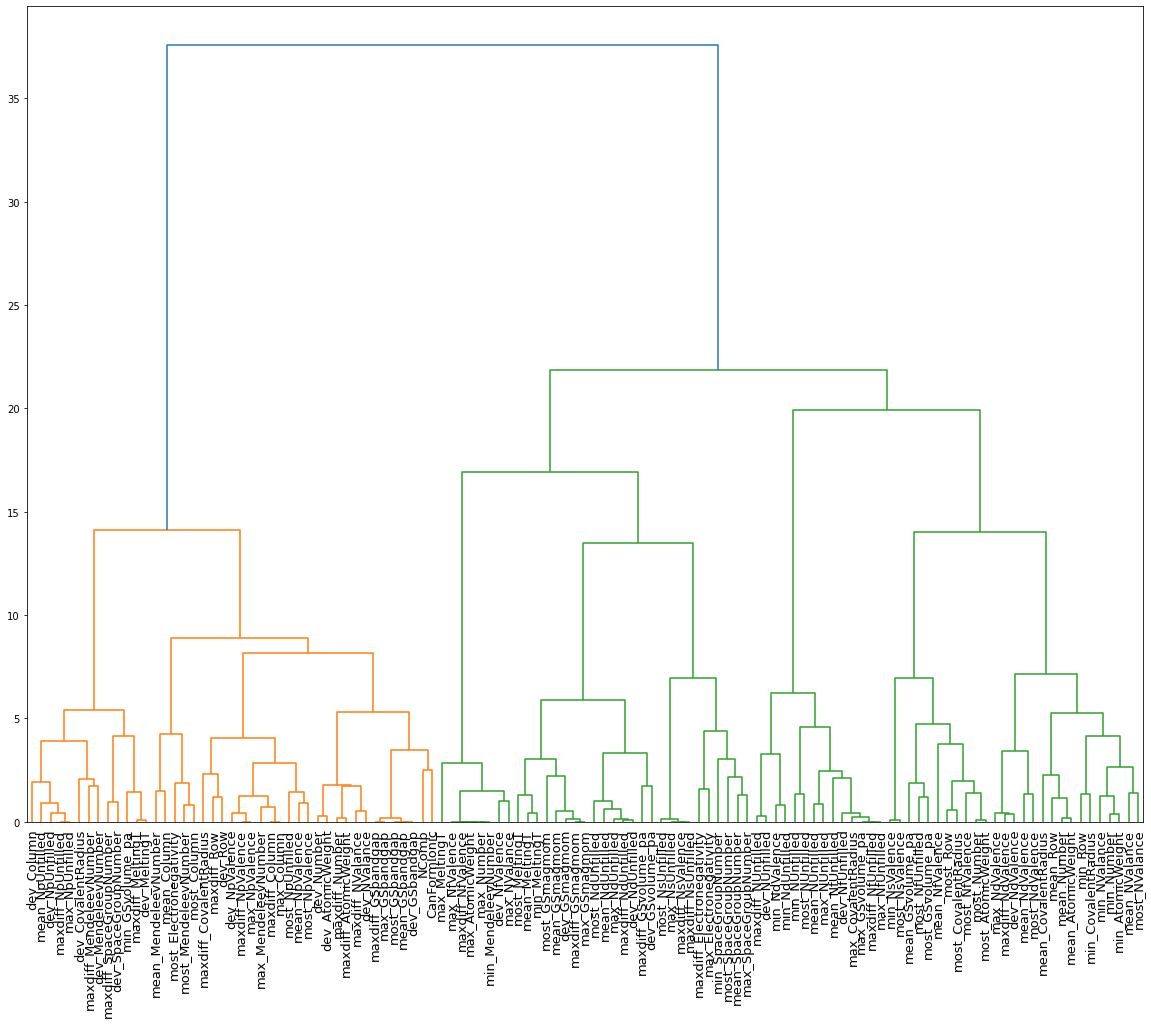

In [18]:
from scipy.cluster import hierarchy

corr_linkage= hierarchy.ward(corr)


import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

dendro = hierarchy.dendrogram(corr_linkage, labels= final_features, leaf_font_size= 13) 


plt.show()

#

In [19]:
print(dendro['leaves'])
print(dendro['ivl'])

len(dendro['leaves'])

[27, 72, 74, 73, 75, 37, 8, 9, 111, 112, 98, 20, 21, 7, 25, 43, 12, 29, 36, 31, 32, 49, 48, 50, 10, 26, 28, 76, 47, 51, 3, 15, 2, 14, 64, 65, 101, 103, 104, 100, 102, 0, 116, 22, 61, 59, 16, 4, 11, 60, 66, 24, 19, 23, 109, 105, 107, 106, 108, 82, 77, 80, 78, 79, 95, 96, 71, 70, 44, 69, 41, 42, 114, 115, 110, 113, 89, 90, 56, 81, 92, 93, 88, 91, 83, 85, 38, 97, 84, 86, 45, 46, 94, 87, 99, 58, 34, 40, 62, 6, 18, 55, 53, 54, 52, 57, 35, 30, 1, 13, 33, 39, 67, 5, 17, 63, 68]
['dev_Column', 'mean_NpUnfilled', 'dev_NpUnfilled', 'maxdiff_NpUnfilled', 'max_NpUnfilled', 'dev_CovalentRadius', 'maxdiff_MendeleevNumber', 'dev_MendeleevNumber', 'maxdiff_SpaceGroupNumber', 'dev_SpaceGroupNumber', 'min_GSvolume_pa', 'maxdiff_MeltingT', 'dev_MeltingT', 'mean_MendeleevNumber', 'mean_Column', 'most_Electronegativity', 'most_MendeleevNumber', 'most_Column', 'maxdiff_CovalentRadius', 'maxdiff_Row', 'dev_Row', 'dev_NpValence', 'maxdiff_NpValence', 'max_NpValence', 'max_MendeleevNumber', 'maxdiff_Column', '

117

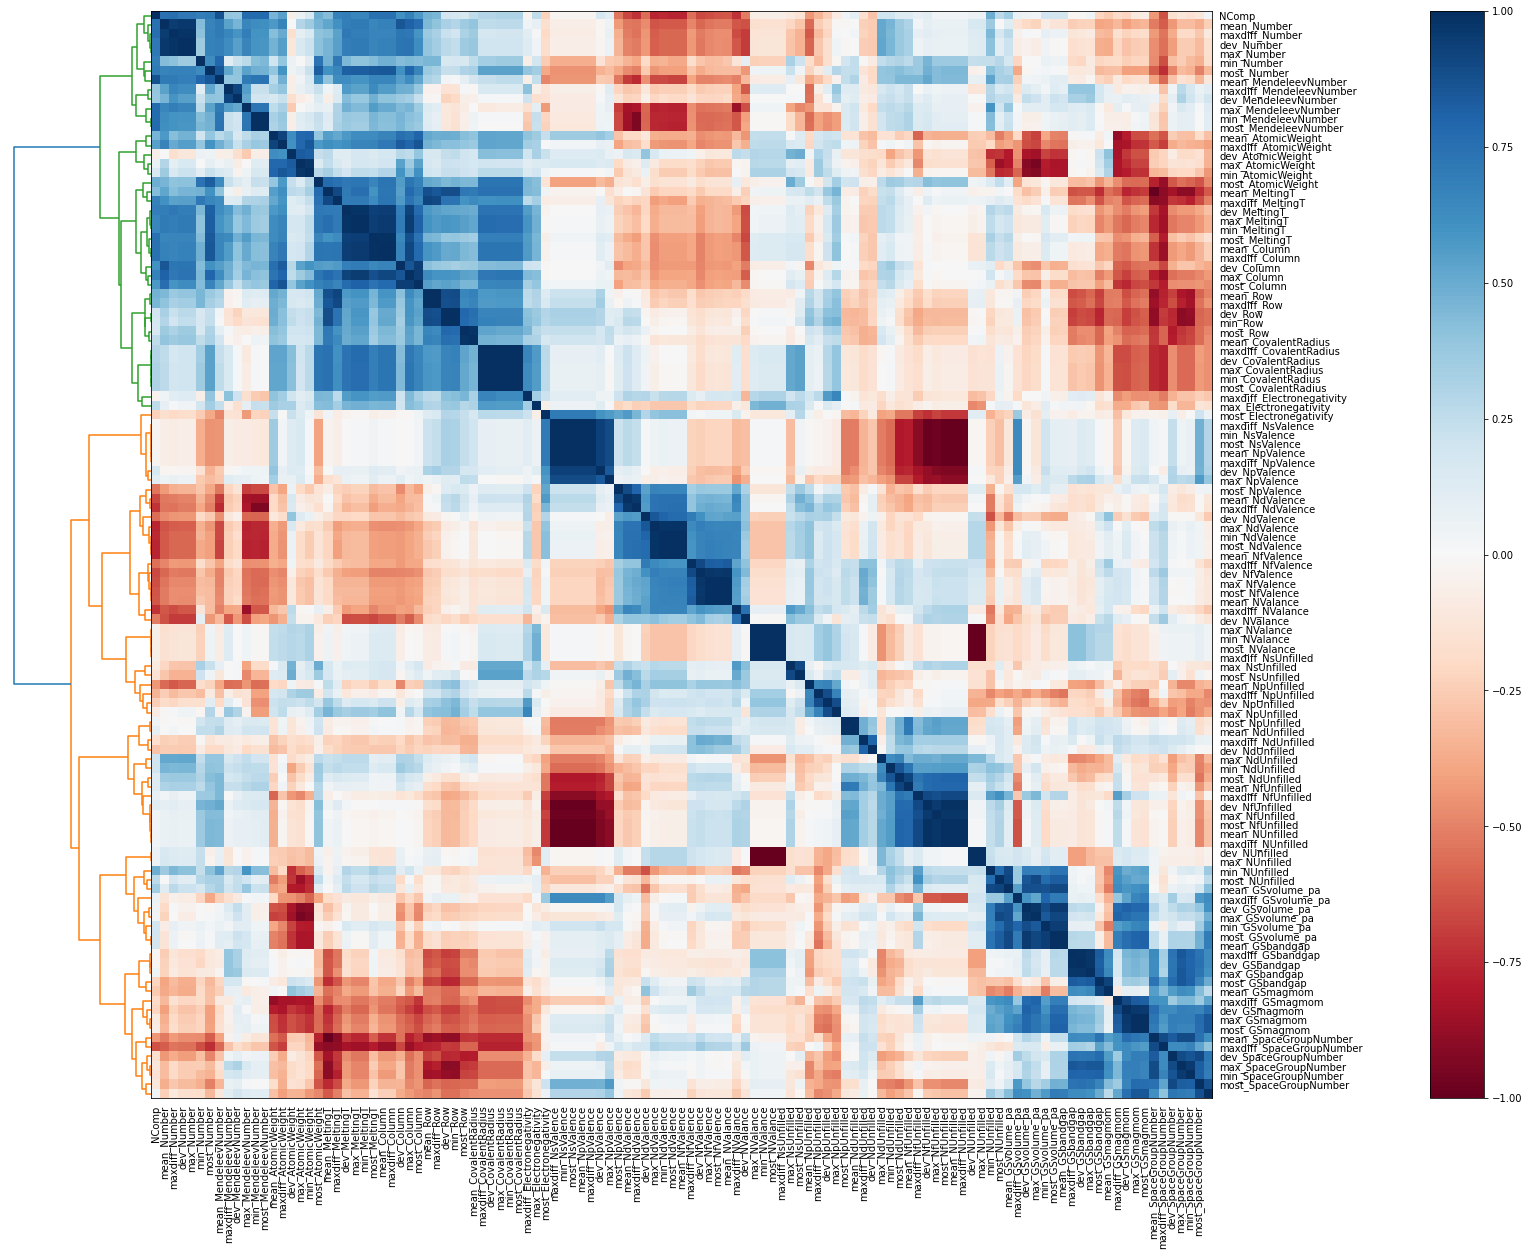

In [20]:

from scipy.spatial.distance import pdist
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(30,20))

main_axes = plt.gca()
divider = make_axes_locatable(main_axes)


plt.sca(divider.append_axes("left", 2.0, pad=0))

 
ydendro = hierarchy.dendrogram(corr_linkage,orientation='left', no_labels=True, distance_sort='descending')
                    
plt.gca().set_axis_off()

plt.sca(main_axes)


img=plt.imshow(corr[dendro['leaves'], :][:, dendro['leaves']],aspect='auto', interpolation='none',cmap='RdBu')

plt.colorbar(pad=0.13)
plt.gca().yaxis.tick_right()
plt.xticks(range(corr_linkage.shape[0]),final_features,rotation=90)
plt.yticks(range(corr_linkage.shape[0]),final_features)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')

plt.show()



In [21]:
#Task 3

In [22]:
cluster_ids = hierarchy.fcluster(corr_linkage, t=2, criterion='distance')
# t - the maximum inter-cluster distance

from collections import defaultdict
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
print(cluster_id_to_feature_ids)

print(cluster_id_to_feature_ids.values())

# cluster_id_to_feature_ids is a minimized from corr_linkage by merging the nearest data.

selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
print(selected_features)
print('number of features after correlation reduction:',len(selected_features))

# selected_features is indicated a rest of features which is omitted by merged the nearest data

defaultdict(<class 'list'>, {14: [0], 40: [1, 13, 30], 12: [2, 3, 14, 15, 64, 65], 16: [4, 11, 16, 59, 60, 61, 66], 43: [5, 17, 67], 36: [6, 18, 34, 40, 62], 6: [7, 25], 2: [8, 9], 10: [10, 26, 28, 48, 49, 50], 7: [12, 29, 43], 18: [19, 23, 24], 5: [20, 21, 98], 17: [22], 1: [27, 72, 73, 74, 75], 8: [31, 32], 42: [33, 39], 41: [35], 9: [36], 3: [37], 32: [38, 84, 85, 86, 97], 24: [41, 42], 23: [44, 69, 70, 71], 34: [45, 46], 11: [47, 51, 76], 39: [52, 57], 38: [53, 54, 55], 29: [56, 81], 37: [58], 44: [63, 68], 21: [77, 78, 79, 80, 82], 33: [83], 35: [87, 94, 99], 31: [88, 91], 28: [89, 90], 30: [92, 93], 22: [95, 96], 13: [100, 101, 102, 103, 104], 19: [105, 106, 107, 108], 20: [109], 25: [110, 113], 4: [111, 112], 27: [114], 26: [115], 15: [116]})
dict_values([[0], [1, 13, 30], [2, 3, 14, 15, 64, 65], [4, 11, 16, 59, 60, 61, 66], [5, 17, 67], [6, 18, 34, 40, 62], [7, 25], [8, 9], [10, 26, 28, 48, 49, 50], [12, 29, 43], [19, 23, 24], [20, 21, 98], [22], [27, 72, 73, 74, 75], [31, 32],

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=20, random_state=0)
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

In [24]:
#Task 4

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

skb = SelectKBest(score_func=f_regression)
est_rf = RandomForestRegressor(random_state=0)
pipe_rf = Pipeline([('SKB', skb), ('forest', est_rf)])

param_grid_rf = {
     'forest__n_estimators':[1,2,3,4, 5, 10, 20, 50, 70, 90, 100],
     'forest__max_depth':[1,2,3,4, 5, 10, 15],
     'forest__max_features':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70],
     'forest__min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,16,18,19,20,22,25]
} 


In [26]:
from sklearn.model_selection import GridSearchCV

gcv_rf = GridSearchCV(estimator = pipe_rf , param_grid = param_grid_rf, cv = 4,return_train_score=True) 
gcv_rf.fit(X_train, y_train)
print('\nRandomForest:', gcv_rf.best_score_)
print(gcv_rf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
29568 fits failed out of a total of 78848.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29568 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/di


RandomForest: 0.371692693419717
{'forest__max_depth': 2, 'forest__max_features': 2, 'forest__min_samples_leaf': 10, 'forest__n_estimators': 20}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.02762414 0.26436587 0.3233937  ...        nan        nan        nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the train scores are non-finite: [0.30155973 0.4003601  0.39673843 ...        nan        nan        nan]
  category=UserWarning,


In [27]:
est_rf = RandomForestRegressor(random_state=0, max_features=10,n_estimators= 5 , max_depth= 1, min_samples_leaf= 16) 


best_results=-10
best_state=-1

for i in range (1000):
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.15, random_state=i)
    X_train=X_train[:,selected_features]
    X_test=X_test[:,selected_features]
    est_rf.fit(X_train,y_train)
    result=est_rf.score(X_test, y_test)
    if result>best_results:
        best_results=result
        best_state=i

print(best_results,best_state)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=best_state)
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

0.6487584303139926 710


In [28]:
#Task 5

In [29]:
from sklearn.inspection import permutation_importance

result = permutation_importance(est_rf, X_train,y_train , n_repeats=10, random_state=0, n_jobs=2)
perm_sorted_idx = result.importances_mean.argsort()

['NComp', 'mean_Number', 'maxdiff_Number', 'dev_Number', 'max_Number', 'min_Number', 'most_Number', 'mean_MendeleevNumber', 'maxdiff_MendeleevNumber', 'dev_MendeleevNumber', 'max_MendeleevNumber', 'min_MendeleevNumber', 'most_MendeleevNumber', 'mean_AtomicWeight', 'maxdiff_AtomicWeight', 'dev_AtomicWeight', 'max_AtomicWeight', 'min_AtomicWeight', 'most_AtomicWeight', 'mean_MeltingT', 'maxdiff_MeltingT', 'dev_MeltingT', 'max_MeltingT', 'min_MeltingT', 'most_MeltingT', 'mean_Column', 'maxdiff_Column', 'dev_Column', 'max_Column', 'most_Column', 'mean_Row', 'maxdiff_Row', 'dev_Row', 'min_Row', 'most_Row', 'mean_CovalentRadius', 'maxdiff_CovalentRadius', 'dev_CovalentRadius', 'max_CovalentRadius', 'min_CovalentRadius', 'most_CovalentRadius', 'maxdiff_Electronegativity', 'max_Electronegativity', 'most_Electronegativity'] [ 0 23 24 25 26 27 28 29 30 22 31 34 35 36 37 38 39 40 41 33 42 21 19  1
  2  4  5  7  8  9 20 43 11 12 13 14 15 17 18 10  6 16 32  3] [0.  0.  0.  0.4 0.  0.  0.2 0.  0.  0

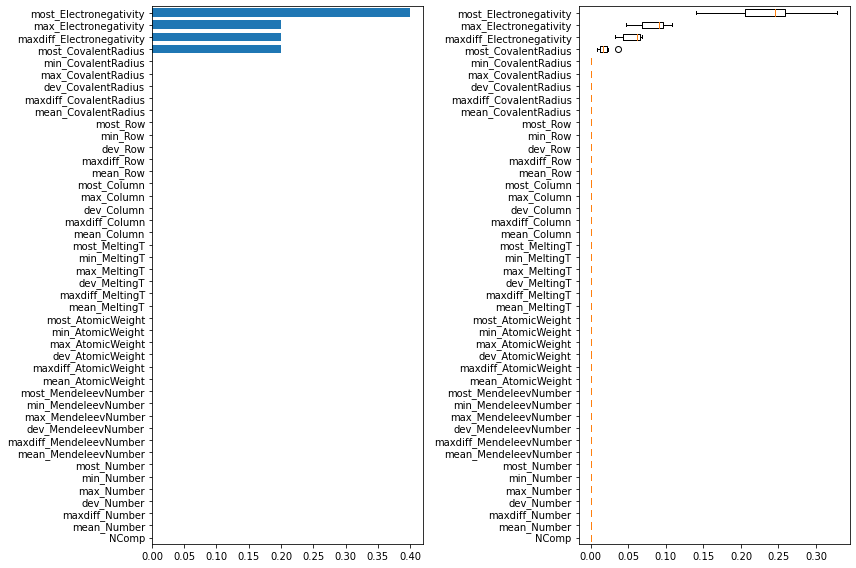

In [30]:
tree_importance_sorted_idx = np.argsort(est_rf.feature_importances_)
tree_indices = np.arange(0, len(est_rf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, est_rf.feature_importances_[tree_importance_sorted_idx], height=0.7)

ylabels=[]
for i in range(len(tree_importance_sorted_idx)):
    ylabels.append(final_features[i])

ax1.set_yticklabels(ylabels)
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(est_rf.feature_importances_)))

labels=[]
for i in range(len(perm_sorted_idx)):
    labels.append(final_features[i])

print(labels,tree_importance_sorted_idx,est_rf.feature_importances_)

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=labels)
fig.tight_layout()
plt.show()

In [31]:
from sklearn.feature_selection import SelectFromModel

ref = RandomForestRegressor(n_estimators=10, random_state=943, n_jobs=-1)

ref.fit(X_train, y_train)

for feature in zip(final_features, ref.feature_importances_):
    print(feature)
    

sfm = SelectFromModel(ref, threshold=0.05)

sfm.fit(X_train, y_train)


for feature_list_index in sfm.get_support(indices=True):
    print(final_features[feature_list_index])
    

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

final_index = sfm.get_support(indices=True)
print(final_index)
print([final_features[i] for i in final_index])

('NComp', 2.9486711625151193e-05)
('mean_Number', 0.022648917494008207)
('maxdiff_Number', 0.06349621894621922)
('dev_Number', 0.10471681188755651)
('max_Number', 0.004947798662804775)
('min_Number', 0.11358981888731981)
('most_Number', 0.048376395841182786)
('mean_MendeleevNumber', 0.0068902826195239315)
('maxdiff_MendeleevNumber', 0.0003308545665090095)
('dev_MendeleevNumber', 0.021739356975810795)
('max_MendeleevNumber', 0.039979600125318614)
('min_MendeleevNumber', 0.05596461157306977)
('most_MendeleevNumber', 0.01461221304797089)
('mean_AtomicWeight', 0.006134441290256712)
('maxdiff_AtomicWeight', 0.0001227993390881727)
('dev_AtomicWeight', 0.0006208878153362475)
('max_AtomicWeight', 0.024534561530705046)
('min_AtomicWeight', 0.017842783004601313)
('most_AtomicWeight', 0.030261426105488376)
('mean_MeltingT', 0.003855569109378907)
('maxdiff_MeltingT', 0.022601580263985226)
('dev_MeltingT', 0.0004990529987233042)
('max_MeltingT', 1.0759869249749552e-05)
('min_MeltingT', 0.0)
('most_

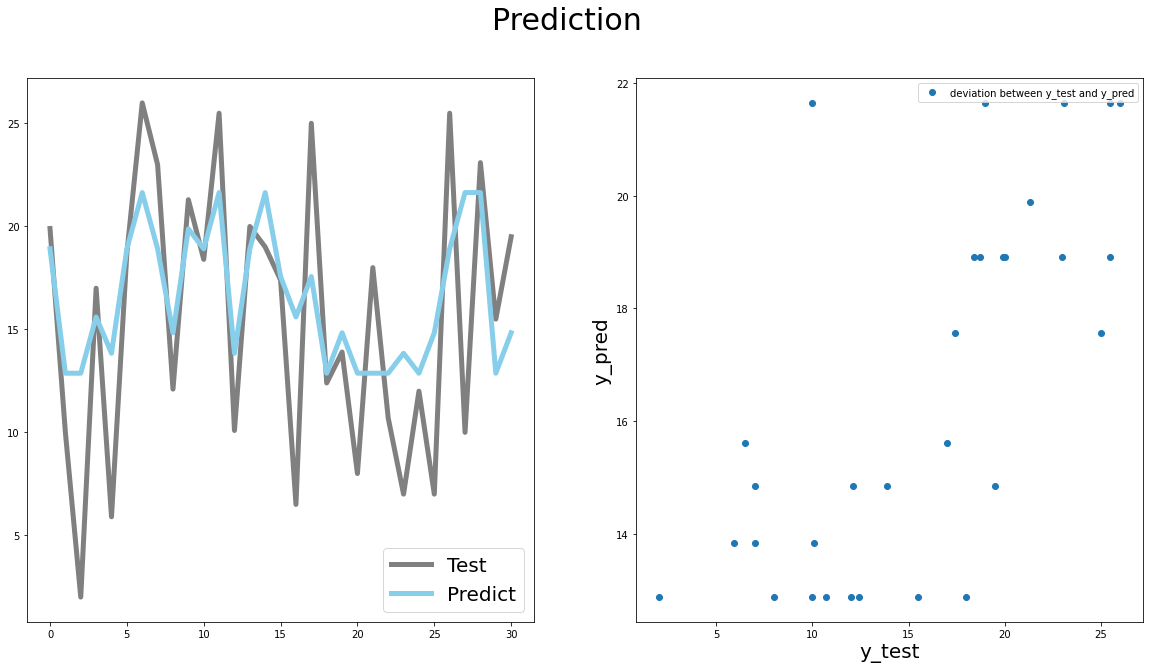

In [32]:
y_pred= est_rf.predict(X_test)

fig, ax=plt.subplots(1, 2, figsize=(20,10))



fig.suptitle("Prediction", fontsize=30)
ax[0].plot(range(len(y_test)), y_test, color='grey',linewidth=5, label='Test')
ax[0].plot(range(len(y_pred)), y_pred, color='skyblue',linewidth=5, label='Predict')
ax[0].legend(fontsize= 20)

ax[1].plot(y_test, y_pred, 'o', label='deviation between y_test and y_pred')
ax[1].set_xlabel('y_test', fontsize=20)
ax[1].set_ylabel('y_pred', fontsize=20)
ax[1].legend(fontsize= 10)





plt.show()

In [6]:
#Task 7

In [7]:
import pandas as pd

data = pd.read_csv('sample_data/poisson_ratio_train.csv')  
print('Dataset shape:', data.shape)
data.describe()

Dataset shape: (9237, 274)


,mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,var_MeanBondLength,min_MeanBondLength,max_MeanBondLength,mean_BondLengthVariation,var_BondLengthVariation,min_BondLengthVariation,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,poisson_ratio
count,9235.000000,9.235000e+03,9235.000000,9235.000000,9.235000e+03,9235.000000,9235.000000,9235.000000,9.235000e+03,9235.000000,...,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000
mean,10.317595,9.554341e-01,8.838992,11.697180,3.947862e-02,0.929671,1.056542,0.079502,2.409379e-02,0.039964,...,123.596839,153.900807,0.250017,0.171290,0.402562,0.176131,0.339612,0.294194,0.117786,0.299120
std,1.930105,9.349765e-01,2.608154,2.649558,3.974299e-02,0.087190,0.064375,0.052603,2.521886e-02,0.040700,...,80.847258,79.847041,0.153432,0.176132,0.248465,0.222584,0.473603,0.262084,0.110522,1.549692
min,4.021817,0.000000e+00,3.939236,4.021817,0.000000e+00,0.394960,1.000000,0.000000,0.000000e+00,0.000000,...,2.000000,2.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-102.890000
25%,9.271728,2.997602e-15,6.000785,10.641168,1.734723e-16,0.895822,1.000000,0.051982,9.343686e-17,0.004987,...,15.000000,74.333333,0.145455,0.022727,0.216216,0.000000,0.000000,0.086069,0.032891,0.250000
50%,10.822880,8.763590e-01,8.644086,11.956922,3.725710e-02,0.958432,1.039360,0.064898,1.867001e-02,0.037121,...,166.000000,194.000000,0.214286,0.111111,0.400000,0.000000,0.000000,0.205784,0.077659,0.300000
75%,11.956922,1.784306e+00,11.956922,12.240861,6.952774e-02,1.000000,1.094230,0.106047,4.096891e-02,0.051982,...,194.000000,225.000000,0.307692,0.283582,0.605263,0.358974,1.000000,0.447278,0.180885,0.350000
max,13.123931,5.021184e+00,12.000000,24.648726,2.234073e-01,1.000000,1.468416,0.540254,1.491243e-01,0.458302,...,229.000000,229.000000,1.000000,0.708333,0.972222,0.857143,1.000000,0.921450,0.458809,77.930000


In [8]:
from sklearn.utils import shuffle
import numpy as np


features = list(data)[2:-1]

properties = list(data)[-1]

data = shuffle(data, random_state=0)
X = data[features]
y = data[properties]

X=np.nan_to_num(X, copy=False)


print('number of features:', len(features))


data.describe()



number of features: 271


,mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,var_MeanBondLength,min_MeanBondLength,max_MeanBondLength,mean_BondLengthVariation,var_BondLengthVariation,min_BondLengthVariation,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,poisson_ratio
count,9235.000000,9.235000e+03,9235.000000,9235.000000,9.235000e+03,9235.000000,9235.000000,9235.000000,9.235000e+03,9235.000000,...,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000
mean,10.317595,9.554341e-01,8.838992,11.697180,3.947862e-02,0.929671,1.056542,0.079502,2.409379e-02,0.039964,...,123.596839,153.900807,0.250017,0.171290,0.402562,0.176131,0.339612,0.294194,0.117786,0.299120
std,1.930105,9.349765e-01,2.608154,2.649558,3.974299e-02,0.087190,0.064375,0.052603,2.521886e-02,0.040700,...,80.847258,79.847041,0.153432,0.176132,0.248465,0.222584,0.473603,0.262084,0.110522,1.549692
min,4.021817,0.000000e+00,3.939236,4.021817,0.000000e+00,0.394960,1.000000,0.000000,0.000000e+00,0.000000,...,2.000000,2.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-102.890000
25%,9.271728,2.997602e-15,6.000785,10.641168,1.734723e-16,0.895822,1.000000,0.051982,9.343686e-17,0.004987,...,15.000000,74.333333,0.145455,0.022727,0.216216,0.000000,0.000000,0.086069,0.032891,0.250000
50%,10.822880,8.763590e-01,8.644086,11.956922,3.725710e-02,0.958432,1.039360,0.064898,1.867001e-02,0.037121,...,166.000000,194.000000,0.214286,0.111111,0.400000,0.000000,0.000000,0.205784,0.077659,0.300000
75%,11.956922,1.784306e+00,11.956922,12.240861,6.952774e-02,1.000000,1.094230,0.106047,4.096891e-02,0.051982,...,194.000000,225.000000,0.307692,0.283582,0.605263,0.358974,1.000000,0.447278,0.180885,0.350000
max,13.123931,5.021184e+00,12.000000,24.648726,2.234073e-01,1.000000,1.468416,0.540254,1.491243e-01,0.458302,...,229.000000,229.000000,1.000000,0.708333,0.972222,0.857143,1.000000,0.921450,0.458809,77.930000


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#data = data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#np.any(np.isnan(reg))
#np.all(np.isfinite(reg))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=100)


reg = RandomForestRegressor(n_estimators=100,  random_state=100)  


#X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#X_train.fillna(0, inplace=True)

#X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#X_test.fillna(0, inplace=True)

reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
y_pred

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
np.sqrt(mean_squared_error(y_test, y_pred)) 

scores = cross_val_score(reg, X, y, cv=3)  




scores.mean()

-1.5827733809909497

In [10]:
from sklearn.feature_selection import VarianceThreshold

sel =  VarianceThreshold(threshold=(0.95*(1-0.95)))

X_sel = sel.fit_transform(X)

feature_index = sel.get_support()
print('number of features after remove redundant ones:',sum(feature_index))

final_features= sel.get_feature_names_out(input_features=features)


number of features after remove redundant ones: 239


In [11]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_sel)

X_sc = scaler.transform(X_sel)



print('X shape:', X_sc.shape)

X shape: (9237, 239)


In [12]:
from scipy.stats import spearmanr
corr = spearmanr(X_sc).correlation
print(corr.shape)

(239, 239)


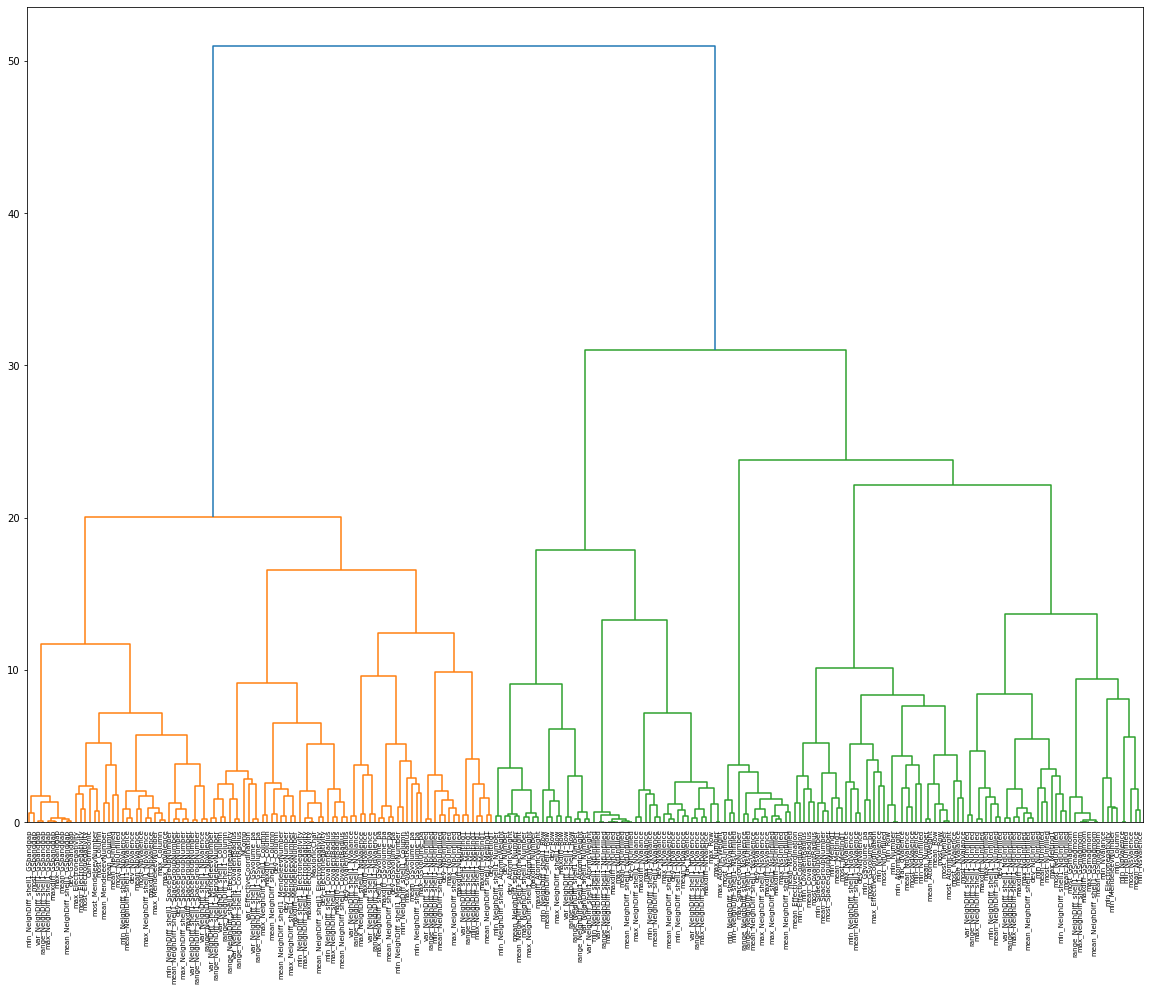

In [13]:
from scipy.cluster import hierarchy

corr_linkage = hierarchy.ward(corr)


import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

dendro = hierarchy.dendrogram(corr_linkage, labels= final_features, leaf_font_size= 7) 



plt.show()

In [14]:
print(dendro['leaves'])
print(dendro['ivl'])

len(dendro['leaves'])

[98, 224, 97, 100, 99, 221, 223, 220, 96, 222, 155, 152, 157, 237, 121, 139, 116, 134, 191, 196, 49, 47, 165, 163, 168, 50, 164, 119, 137, 166, 106, 104, 231, 107, 230, 105, 108, 48, 51, 10, 13, 25, 28, 42, 35, 38, 109, 1, 92, 95, 27, 135, 24, 136, 9, 118, 12, 117, 40, 41, 153, 238, 39, 154, 36, 37, 147, 34, 148, 63, 66, 55, 170, 53, 56, 94, 215, 91, 216, 11, 26, 149, 214, 93, 217, 72, 75, 73, 71, 193, 194, 74, 192, 20, 23, 21, 22, 129, 19, 130, 6, 16, 112, 124, 4, 14, 7, 17, 111, 123, 31, 29, 142, 32, 141, 30, 33, 8, 18, 5, 15, 83, 82, 85, 84, 204, 206, 203, 81, 205, 65, 182, 184, 64, 62, 183, 178, 57, 177, 59, 175, 236, 58, 61, 60, 176, 143, 113, 125, 190, 44, 68, 232, 46, 70, 43, 160, 45, 159, 69, 188, 189, 67, 187, 0, 2, 150, 146, 151, 233, 229, 234, 132, 128, 133, 172, 54, 52, 171, 218, 219, 3, 179, 207, 144, 114, 126, 235, 169, 174, 173, 201, 110, 122, 140, 145, 115, 127, 180, 181, 186, 87, 90, 89, 209, 211, 88, 86, 210, 77, 80, 79, 198, 200, 76, 199, 212, 208, 213, 131, 202, 78,

239

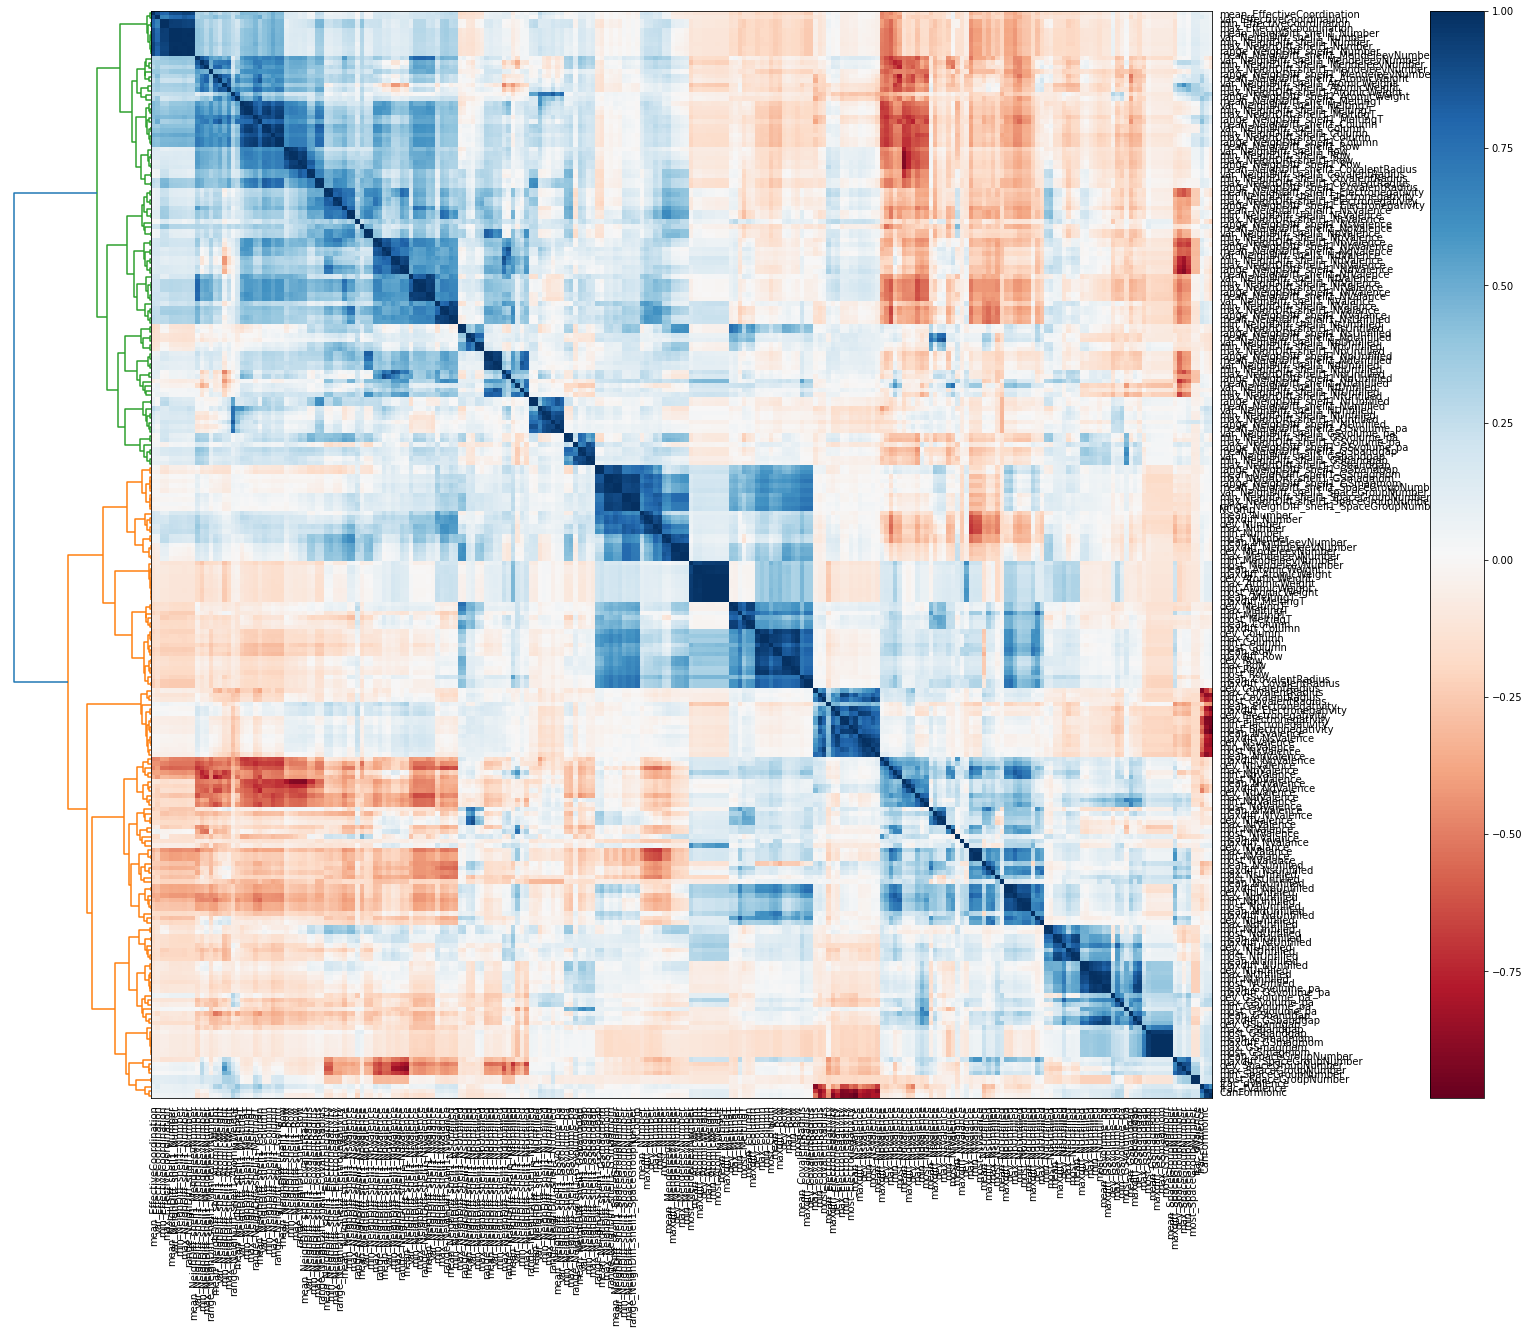

In [15]:
from scipy.spatial.distance import pdist
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(30,20))

main_axes = plt.gca()
divider = make_axes_locatable(main_axes)


plt.sca(divider.append_axes("left", 2.0, pad=0))

 
ydendro = hierarchy.dendrogram(corr_linkage,orientation='left', no_labels=True, distance_sort='descending')
                    
plt.gca().set_axis_off()

plt.sca(main_axes)


img=plt.imshow(corr[dendro['leaves'], :][:, dendro['leaves']],aspect='auto', interpolation='none',cmap='RdBu')

plt.colorbar(pad=0.13)
plt.gca().yaxis.tick_right()
plt.xticks(range(corr_linkage.shape[0]),final_features,rotation=90)
plt.yticks(range(corr_linkage.shape[0]),final_features)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')

plt.show()

In [16]:
cluster_ids = hierarchy.fcluster(corr_linkage, t=2, criterion='distance')
# t - the maximum inter-cluster distance

from collections import defaultdict
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
print(cluster_id_to_feature_ids)

print(cluster_id_to_feature_ids.values())

# cluster_id_to_feature_ids is a minimized from corr_linkage by merging the nearest data.

selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
print(selected_features)
print('number of features after correlation reduction:',len(selected_features))

defaultdict(<class 'list'>, {54: [0, 2], 15: [1], 65: [3], 39: [4, 14, 112, 124], 44: [5, 8, 15, 18], 38: [6, 16], 40: [7, 17, 111, 123], 19: [9, 12, 117, 118], 12: [10, 13, 25, 28], 28: [11, 26], 36: [19, 22, 129, 130], 35: [20, 23], 37: [21], 18: [24, 136], 17: [27, 135], 41: [29, 32, 141, 142], 43: [30, 33], 42: [31], 22: [34, 37, 147, 148], 13: [35, 38, 42], 23: [36], 20: [39, 41, 153, 154, 238], 21: [40], 52: [43, 45, 46, 67, 69, 70, 159, 160, 187, 188, 189], 51: [44, 68, 190], 7: [47, 49, 165], 11: [48, 51], 8: [50, 119, 137, 163, 164, 166, 168], 59: [52, 171], 26: [53, 56], 60: [54], 25: [55, 170], 48: [57, 59, 175, 177, 178, 236], 49: [58, 60, 61, 176], 47: [62, 64, 183, 184], 24: [63, 66], 46: [65, 182], 33: [71, 74, 192, 193, 194], 32: [72, 75], 34: [73], 79: [76, 79, 198, 199, 200], 78: [77, 80], 82: [78, 197, 202], 45: [81, 82, 83, 84, 85, 203, 204, 205, 206], 77: [86, 88, 210, 211], 75: [87, 90], 76: [89, 209], 27: [91, 94, 215, 216], 14: [92, 95], 29: [93, 217], 1: [96, 9

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=5, random_state=0)
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

In [44]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

skb = SelectKBest(score_func=f_regression)
est_rf = RandomForestRegressor(random_state=0)
pipe_rf = Pipeline([('SKB', skb), ('forest', est_rf)])

param_grid_rf = {
     'forest__n_estimators':[1,2,3,4, 5, 10, 50],
     'forest__max_depth':[1,2,3,4, 5],
     'forest__max_features':[1,3,5,7,9,10],
     'forest__min_samples_leaf':[1,2,4,6,8,10,13,15,19]
} 

In [45]:
from sklearn.model_selection import GridSearchCV

gcv_rf = GridSearchCV(estimator = pipe_rf , param_grid = param_grid_rf, cv = 4,return_train_score=True) 
gcv_rf.fit(X_train, y_train)
print('\nRandomForest:', gcv_rf.best_score_)
print(gcv_rf.best_params_)


RandomForest: -0.014789402276378594
{'forest__max_depth': 2, 'forest__max_features': 1, 'forest__min_samples_leaf': 1, 'forest__n_estimators': 3}


In [36]:
est_rf = RandomForestRegressor(random_state=0, max_features=1,n_estimators= 3 , max_depth= 2, min_samples_leaf= 1) 


best_results=-10
best_state=-1

for i in range (1000):
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=5, random_state=i)
    X_train=X_train[:,selected_features]
    X_test=X_test[:,selected_features]
    est_rf.fit(X_train,y_train)
    result=est_rf.score(X_test, y_test)
    if result>best_results:
        best_results=result
        best_state=i

print(best_results,best_state)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=5, random_state=best_state)
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

0.9701431358136827 720


In [37]:
from sklearn.inspection import permutation_importance

result = permutation_importance(est_rf, X_train,y_train , n_repeats=10, random_state=720, n_jobs=2)
perm_sorted_idx = result.importances_mean.argsort()

['mean_EffectiveCoordination', 'var_EffectiveCoordination', 'min_EffectiveCoordination', 'max_EffectiveCoordination', 'mean_NeighDiff_shell1_Number', 'var_NeighDiff_shell1_Number', 'min_NeighDiff_shell1_Number', 'max_NeighDiff_shell1_Number', 'range_NeighDiff_shell1_Number', 'mean_NeighDiff_shell1_MendeleevNumber', 'var_NeighDiff_shell1_MendeleevNumber', 'min_NeighDiff_shell1_MendeleevNumber', 'max_NeighDiff_shell1_MendeleevNumber', 'range_NeighDiff_shell1_MendeleevNumber', 'mean_NeighDiff_shell1_AtomicWeight', 'var_NeighDiff_shell1_AtomicWeight', 'min_NeighDiff_shell1_AtomicWeight', 'max_NeighDiff_shell1_AtomicWeight', 'range_NeighDiff_shell1_AtomicWeight', 'mean_NeighDiff_shell1_MeltingT', 'var_NeighDiff_shell1_MeltingT', 'min_NeighDiff_shell1_MeltingT', 'max_NeighDiff_shell1_MeltingT', 'range_NeighDiff_shell1_MeltingT', 'mean_NeighDiff_shell1_Column', 'var_NeighDiff_shell1_Column', 'min_NeighDiff_shell1_Column', 'max_NeighDiff_shell1_Column', 'range_NeighDiff_shell1_Column', 'mean_N

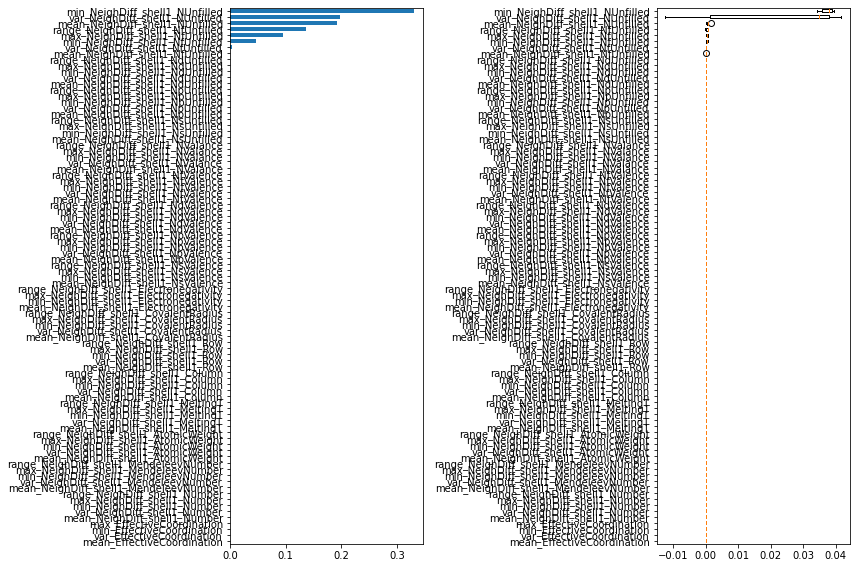

In [38]:
tree_importance_sorted_idx = np.argsort(est_rf.feature_importances_)
tree_indices = np.arange(0, len(est_rf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, est_rf.feature_importances_[tree_importance_sorted_idx], height=0.7)

ylabels=[]
for i in range(len(tree_importance_sorted_idx)):
    ylabels.append(final_features[i])

ax1.set_yticklabels(ylabels)
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(est_rf.feature_importances_)))

labels=[]
for i in range(len(perm_sorted_idx)):
    labels.append(final_features[i])

print(labels,tree_importance_sorted_idx,est_rf.feature_importances_)

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=labels)
fig.tight_layout()
plt.show()

In [39]:
from sklearn.feature_selection import SelectFromModel

ref = RandomForestRegressor(n_estimators=5, random_state=720, n_jobs=-1)

ref.fit(X_train, y_train)

for feature in zip(final_features, ref.feature_importances_):
    print(feature)
    

sfm = SelectFromModel(ref, threshold=0.05)

sfm.fit(X_train, y_train)


for feature_list_index in sfm.get_support(indices=True):
    print(final_features[feature_list_index])
    

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

final_index = sfm.get_support(indices=True)
print(final_index)
print([final_features[i] for i in final_index])

('mean_EffectiveCoordination', 0.0010248102911824268)
('var_EffectiveCoordination', 0.0012461339596889678)
('min_EffectiveCoordination', 0.0017069283153368724)
('max_EffectiveCoordination', 0.021239004285085645)
('mean_NeighDiff_shell1_Number', 8.765467742399321e-05)
('var_NeighDiff_shell1_Number', 0.045369255375313104)
('min_NeighDiff_shell1_Number', 0.0006215208522736438)
('max_NeighDiff_shell1_Number', 0.00023780412198680327)
('range_NeighDiff_shell1_Number', 0.0011063094415704993)
('mean_NeighDiff_shell1_MendeleevNumber', 0.002498945574189681)
('var_NeighDiff_shell1_MendeleevNumber', 0.014661339553634934)
('min_NeighDiff_shell1_MendeleevNumber', 0.0007643416561096103)
('max_NeighDiff_shell1_MendeleevNumber', 0.031385394602860654)
('range_NeighDiff_shell1_MendeleevNumber', 0.029091664832073427)
('mean_NeighDiff_shell1_AtomicWeight', 0.00042165465200107394)
('var_NeighDiff_shell1_AtomicWeight', 0.006282477452806114)
('min_NeighDiff_shell1_AtomicWeight', 8.625074443647409e-05)
('max_N

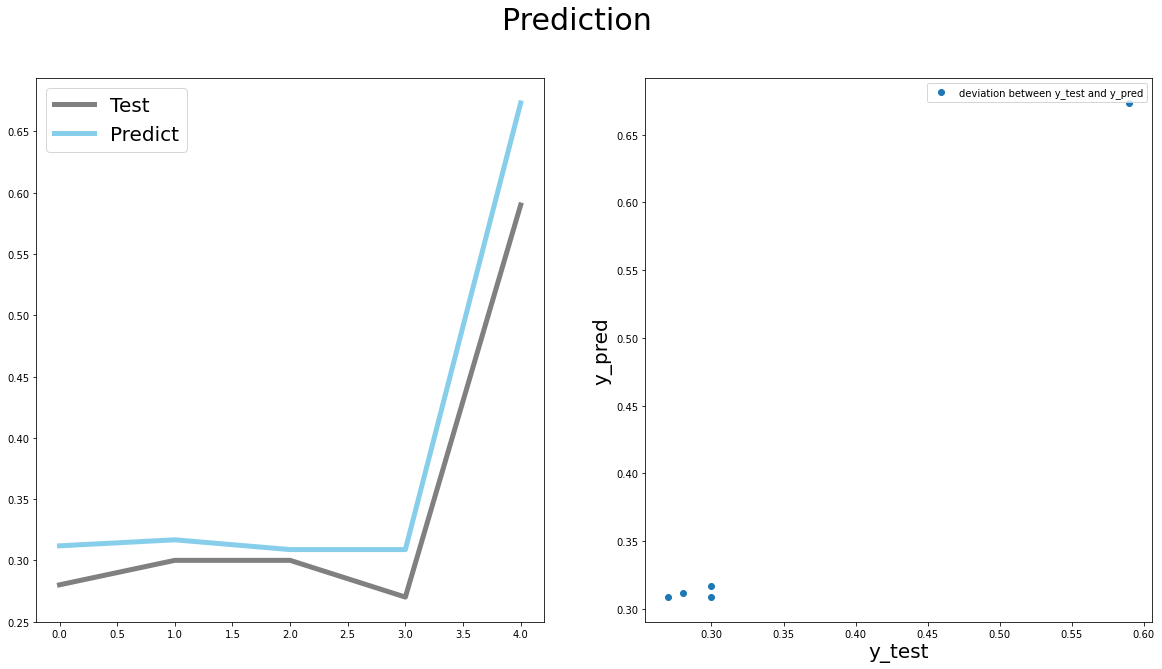

In [40]:
y_pred= est_rf.predict(X_test)

fig, ax=plt.subplots(1, 2, figsize=(20,10))



fig.suptitle("Prediction", fontsize=30)
ax[0].plot(range(len(y_test)), y_test, color='grey',linewidth=5, label='Test')
ax[0].plot(range(len(y_pred)), y_pred, color='skyblue',linewidth=5, label='Predict')
ax[0].legend(fontsize= 20)

ax[1].plot(y_test, y_pred, 'o', label='deviation between y_test and y_pred')
ax[1].set_xlabel('y_test', fontsize=20)
ax[1].set_ylabel('y_pred', fontsize=20)
ax[1].legend(fontsize= 10)





plt.show()

In [46]:
#task 8

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=5, random_state=720)
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

from sklearn.svm import SVR

SVM_model=SVR()
SVM_model.fit(X_train, y_train)
y_pred_svm = SVM_model.predict(X_test)

import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=5, learning_rate=0.08, gamma=0, subsample=0.75, max_depth=1)
#xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=5, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=1)

xgb_model.fit(X_train, y_train)
y_pred_xgb =xgb_model.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_lr)
np.sqrt(mean_squared_error(y_test, y_pred_lr)) 

scores_lr = cross_val_score(model_lr, X, y, cv=4)  

print('score of lr :',scores_lr.mean())

mean_squared_error(y_test, y_pred_svm)
np.sqrt(mean_squared_error(y_test, y_pred_svm)) 

scores_SVM = cross_val_score(SVM_model, X, y, cv=4)  

print('score of SVM :',scores_SVM.mean())

mean_squared_error(y_test, y_pred_lr)
np.sqrt(mean_squared_error(y_test, y_pred_xgb)) 

scores_xgb = cross_val_score(xgb_model, X, y, cv=4)  

print('score of xgb :',scores_xgb.mean())



score of lr : -0.31441846050259514
score of SVM : 0.001141608387709242
score of xgb : -0.07511905485185538
